In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import sipmath as sm
import sipmath.pymetalog as pm

Basic SIPmath Demo

In [2]:
model = sm.sipmodel(10000, name='test_slurp', origin='colin made me', about='this is a test for sam')

input_1 = model.sipinput(distribution='normal', generator='hdr', name='normal distribution')
input_2 = model.sipinput(distribution='uniform', generator='rand', name='uniform distribution')

model.sample()

model.to_df().iloc[:5]

,normal distribution,uniform distribution
trial,,
0,0.709096,0.415980
1,0.331412,0.333861
2,1.745428,0.866285
3,0.868738,0.549324
4,-0.035726,0.126055


<function matplotlib.pyplot.show(close=None, block=None)>

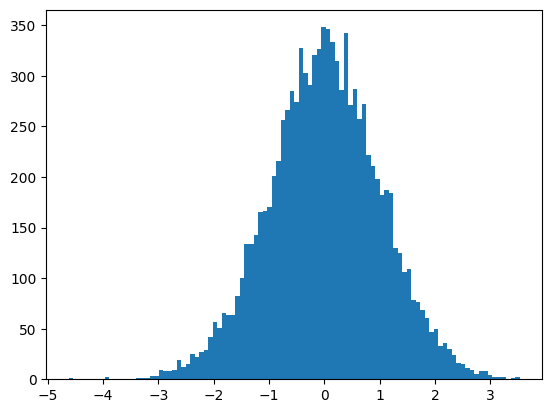

In [3]:
plt.hist(input_1, 100)
plt.show

Arithmetic works!

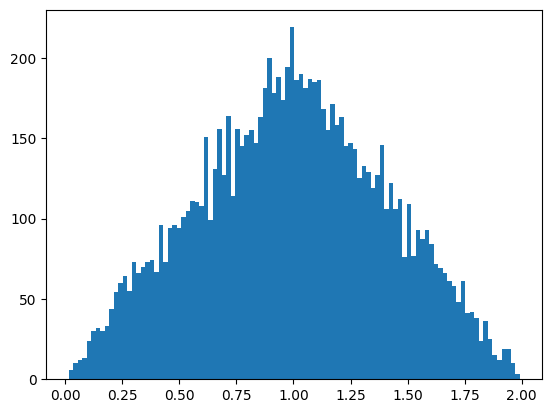

In [4]:
input_3 = model.sipinput(distribution='uniform')
model.sample()

plt.hist(input_2+input_3, 100)
plt.show()

Lets time some sampling...

In [5]:
model2 = sm.sipmodel(1000000)
input_21 = model2.sipinput(distribution='exponential')
input_22 = model2.sipinput(distribution='exponential')
input_23 = model2.sipinput(distribution='exponential')

start = time.time()
model2.sample()
end = time.time()
(end - start)

0.08965873718261719

300,000,000 individual samples in a small amount of time...

In [6]:
start = time.time()
elementwise_sum = input_21+input_22+input_23
end = time.time()
(end - start)

0.0027818679809570312

Math on samples pretty fast

METALOG DISTRIBUTIONS - full functionality of RMetalog

In [7]:
fd = np.loadtxt('sipmath/pymetalog/fishout.csv', delimiter=',', skiprows=1, dtype='str')[:,1]
print(fd)
fish_data = fd.astype(np.float64)
print(fish_data)

fish_metalog = pm.metalog(x=fish_data, bounds=[0,60], boundedness='b', step_len = 0.01, term_limit=9)

pm.plot(fish_metalog)

['3' '3' '3' ... '32' '32.5' '33']
[ 3.   3.   3.  ... 32.  32.5 33. ]


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# quantile functions
pm.qmetalog(fish_metalog, y =[0.25,0.5,0.75], term = 9)

In [ ]:
# percentile functions
pm.pmetalog(fish_metalog, q = [3, 10, 25], term = 9)

In [ ]:
# density functions
pm.dmetalog(fish_metalog, q = [3, 10, 25], term = 9)

Metalogs can be SIP distributions...

In [ ]:
model3 = sm.sipmodel(100000, name='test_for_sam')

fish_sip = model3.sipinput(distribution='metalog', metalog=fish_metalog, term=9)

model3.sample()

plt.hist(fish_sip, 100)
plt.show()

Arithmetic can be performed on these sips just like any other...

In [ ]:
normal_sip = model3.sipinput(distribution='normal')
model3.sample()

plt.hist(normal_sip+fish_sip,100)
plt.show()

In [ ]:
model3.to_xml('sam_test.xml')

In [ ]:
#not yet working - xml to python translation
#model4 = sm.from_xml('path')